<a href="https://colab.research.google.com/github/cindy1404hsieh/Ciencia-de-Datos/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importacion de librerias y preparacion del entorno de trabajo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install squarify
!pip install pycountry
!pip install airportsdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.0/911.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
import squarify as squarify
from pycountry import countries
import airportsdata
airports = airportsdata.load('IATA')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
customer_airways_data=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/customer_airways_data.csv', encoding='ISO-8859-1')
cleaned_reviews=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cleaned-reviews.csv', parse_dates = ['date'])
del cleaned_reviews['Unnamed: 0']

# **Limpieza cleaned_reviews**

In [ ]:
cleaned_reviews #hay reviews y comments repetidos

,reviews,rates,date,country,verified,comments
0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...
3406,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


Vemos si hay reviews que se repitan con un value_counts

In [ ]:
cleaned_reviews['reviews'].value_counts()

reviews
GIG-LHR B773 Newly refurbished cabin. Seats were good and comfortable food was reasonable and entertainment was great HD screen with many options.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Verificamos con un ejemplo particular, para mismo review todos los datos son iguales excepto rates

In [ ]:
cleaned_reviews[cleaned_reviews['reviews'] == 'GIG-LHR B773 Newly refurbished cabin. Seats were good and comfortable food was reasonable and entertainment was great HD screen with many options.']

,reviews,rates,date,country,verified,comments
3094,GIG-LHR B773 Newly refurbished cabin. Seats we...,10,2014-10-28,Denmark,False,gig lhr b newly refurbished cabin seat good co...
3100,GIG-LHR B773 Newly refurbished cabin. Seats we...,4,2014-10-28,Denmark,False,gig lhr b newly refurbished cabin seat good co...


In [ ]:
cleaned_reviews.groupby(['reviews', 'comments'])['rates'].count().to_frame().reset_index()

,reviews,comments,rates
0,06.40 flight 4 August Glasgow to London City c...,flight august glasgow london city cancelled ex...,1
1,10 April 2015 Airbus A320 Business Heathrow to...,april airbus business heathrow rome fco total ...,1
2,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",lhr gla seat able choose seat advance plenty l...,1
3,10th July BA117 LHR-JFK. Well I have not flown...,th july ba lhr jfk well flown ba number year f...,1
4,12/2013. LHR-LAX. A380. Aircraft was clean. Se...,lhr lax aircraft clean seat comfortable leg sp...,1
...,...,...,...
3392,❎ Unverified | London to Barbados. Having use...,unverified london barbados used avios point ma...,1
3393,❎ Unverified | London to Hong Kong. The Avios...,unverified london hong kong avios system compl...,1
3394,❎ Unverified | London to Reykjavik. I can't r...,unverified london reykjavik really review flig...,1
3395,❎ Unverified | Oh dear: cost-cutting on Briti...,unverified oh dear cost cutting british airway...,1


In [ ]:
cleaned_reviews.groupby(['reviews', 'comments'])['rates'].count().to_frame().reset_index()['rates'].value_counts()

rates
1    3383
2      14
Name: count, dtype: int64

no hay duda de que hay reviews y comments repetidos en los que se dan rates distintos

In [ ]:
reviews_limpias = cleaned_reviews.drop_duplicates(['reviews', 'comments'], keep=False)

Eliminamos columnas con reviews y comments repetidos, tanto original como repetido, ya que no podemos saber cual de los dos es valido

In [ ]:
reviews_limpias

,reviews,rates,date,country,verified,comments
0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...
3406,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


Agregamos el dato del dia de vuelo (flight_day) para facilitar la operacion de merge con el otro dataframe

In [ ]:
reviews_limpias['flight_day'] = reviews_limpias['date'].dt.day_name()
reviews_limpias['flight_day'] = reviews_limpias['flight_day'].str.slice(stop=3)
reviews_limpias.head()

,reviews,rates,date,country,verified,comments,flight_day
0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,Tue
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,Tue
2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,Mon
3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,Sat
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,Thu


In [ ]:
reviews_limpias['date'] = pd.to_datetime(reviews_limpias['date'])
reviews_limpias['flight_day'] = reviews_limpias['date'].dt.day_name().str.slice(stop=3)
reviews_limpias.head()

,reviews,rates,date,country,verified,comments,flight_day
0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,Tue
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,Tue
2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,Mon
3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,Sat
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,Thu


In [ ]:
reviews_limpias.count()

reviews       3383
rates         3383
date          3383
country       3383
verified      3383
comments      3383
flight_day    3383
dtype: int64

Terminamos con el primer dataframe

# **Limpieza customer_airways_data**

Eliminamos del dataframes aquellas filas que sean repetidas

In [ ]:
customer_airways_data = customer_airways_data.drop_duplicates()

Parseo: Aprovechamos que tenemos informacion de la ruta de vuelo y con la ayuda de librerias externas lo usamos para agregar nuevos datos. Por un lado el pais de origen del vuelo y pais de destino, los cuales no estaban de forma explicita.

In [ ]:
customer_airways_data ['flight_origin'] = customer_airways_data['route'].str.slice(stop=3)
customer_airways_data ['flight_destiny'] = customer_airways_data['route'].str.slice(start=3)

customer_airways_data ['flight_origin'] = customer_airways_data ['flight_origin'].map(lambda x: countries.lookup(airports[x]['country']).name)
customer_airways_data ['flight_destiny'] = customer_airways_data ['flight_destiny'].map(lambda x: countries.lookup(airports[x]['country']).name)

customer_airways_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_origin,flight_destiny
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,New Zealand,India
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,New Zealand,India
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,New Zealand,India
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,New Zealand,India
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,New Zealand,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,Australia,Cambodia
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,Australia,Cambodia
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,Australia,Cambodia


Acomodamos las columnas para que las que son afines queden juntas

In [ ]:
a = customer_airways_data.pop('flight_origin')
b = customer_airways_data.pop('flight_destiny')

customer_airways_data.insert(loc=8, column='flight_origin', value=a)
customer_airways_data.insert(loc=9, column='flight_destiny', value=b)

customer_airways_data.info()

customer_airways_data

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   flight_origin          49281 non-null  object 
 9   flight_destiny         49281 non-null  object 
 10  booking_origin         49281 non-null  object 
 11  wants_extra_baggage    49281 non-null  int64  
 12  wants_preferred_seat   49281 non-null  int64  
 13  wants_in_flight_meals  49281 non-null  int64  
 14  flight_duration        49281 non-null  float64
 15  booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,flight_origin,flight_destiny,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,New Zealand,India,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,Cambodia,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,Cambodia,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,Cambodia,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,Cambodia,Australia,1,0,1,5.62,0


In [ ]:
customer_airways_data['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

Terminamos limpieza de customer_airways_data

# **Merge de ambos dataframes**

In [ ]:
final_df = pd.merge(customer_airways_data, reviews_limpias, left_on=['booking_origin', 'flight_day'], right_on=['country', 'flight_day'], how='inner')
len(final_df)

498335

In [ ]:
final_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,flight_origin,flight_destiny,...,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,reviews,rates,date,country,verified,comments
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,...,0,0,5.52,0,✅ Trip Verified | I flew yesterday from Heath...,1,2019-07-20,New Zealand,True,flew yesterday heathrow manchester business cl...
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,...,0,0,5.52,0,Smooth take off and landing. Plane about 75% ...,1,2015-11-14,New Zealand,False,smooth take landing plane full mostly business...
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,...,0,0,5.52,0,✅ Trip Verified | I flew yesterday from Heath...,1,2019-07-20,New Zealand,True,flew yesterday heathrow manchester business cl...
3,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,...,0,0,5.52,0,Smooth take off and landing. Plane about 75% ...,1,2015-11-14,New Zealand,False,smooth take landing plane full mostly business...
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,...,0,1,5.52,0,✅ Trip Verified | I flew yesterday from Heath...,1,2019-07-20,New Zealand,True,flew yesterday heathrow manchester business cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498330,2,Internet,RoundTrip,104,6,14,Sun,DPSHND,Indonesia,Japan,...,0,0,7.57,0,✅ Trip Verified | Mexico City to Barcelona via...,1,2019-10-13,Mexico,True,mexico city barcelona via london heathrow b in...
498331,2,Internet,RoundTrip,104,6,14,Sun,DPSHND,Indonesia,Japan,...,0,0,7.57,0,Without being completely detrimental to BA I H...,4,2014-10-12,Mexico,False,without completely detrimental ba found airlin...
498332,1,Internet,RoundTrip,38,6,22,Tue,HKTPER,Thailand,Australia,...,1,1,5.62,0,✅ Verified Review | \nFlew British Airways fr...,2,2017-06-27,Ghana,False,review flew british airway beijing london heat...
498333,1,Internet,RoundTrip,38,6,22,Tue,HKTPER,Thailand,Australia,...,1,1,5.62,0,I wish I could comment on the service on the a...,3,2015-08-18,Ghana,False,wish could comment service aircraft hour delay...


In [ ]:
final_df.count()

num_passengers           498335
sales_channel            498335
trip_type                498335
purchase_lead            498335
length_of_stay           498335
flight_hour              498335
flight_day               498335
route                    498335
flight_origin            498335
flight_destiny           498335
booking_origin           498335
wants_extra_baggage      498335
wants_preferred_seat     498335
wants_in_flight_meals    498335
flight_duration          498335
booking_complete         498335
reviews                  498335
rates                    498335
date                     498335
country                  498335
verified                 498335
comments                 498335
dtype: int64

terminado el merge

# **Plots**

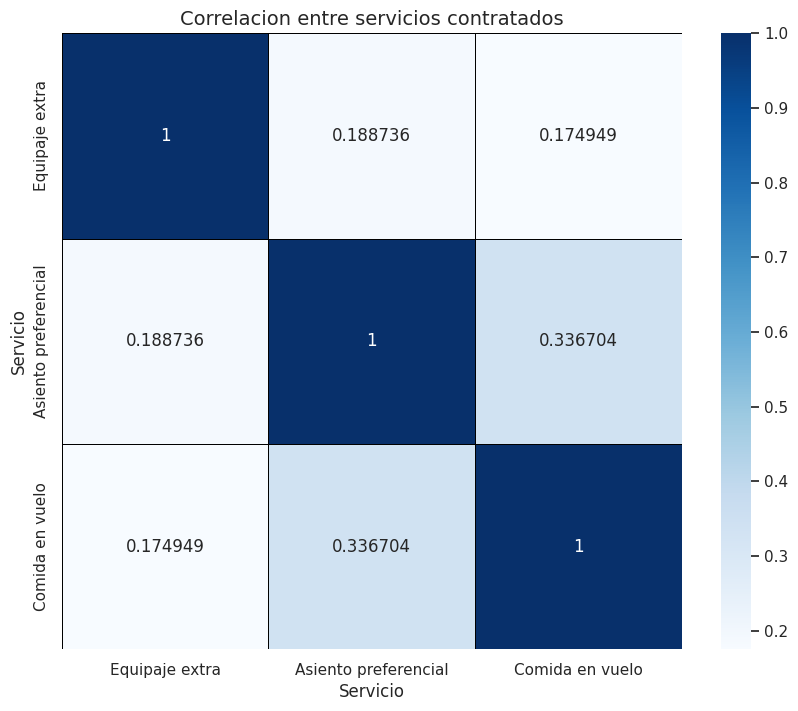

In [ ]:
plt.figure(figsize=(10,8))
c = customer_airways_data.loc[customer_airways_data['booking_complete'] == 1, ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']]
c.columns = [['Equipaje extra', 'Asiento preferencial', 'Comida en vuelo']]
s=sns.heatmap(c.corr(), linewidth=0.5, linecolor='black', annot=True, cmap='Blues', fmt='g')
s.set_xlabel('Servicio', fontsize=12)
s.set_ylabel('Servicio', fontsize=12)
plt.title('Correlacion entre servicios contratados', size=14)
plt.show()



---



Ver si vuelos mas largos se traduce en comprar comidad en los vuelos

(4.0, 10.0)

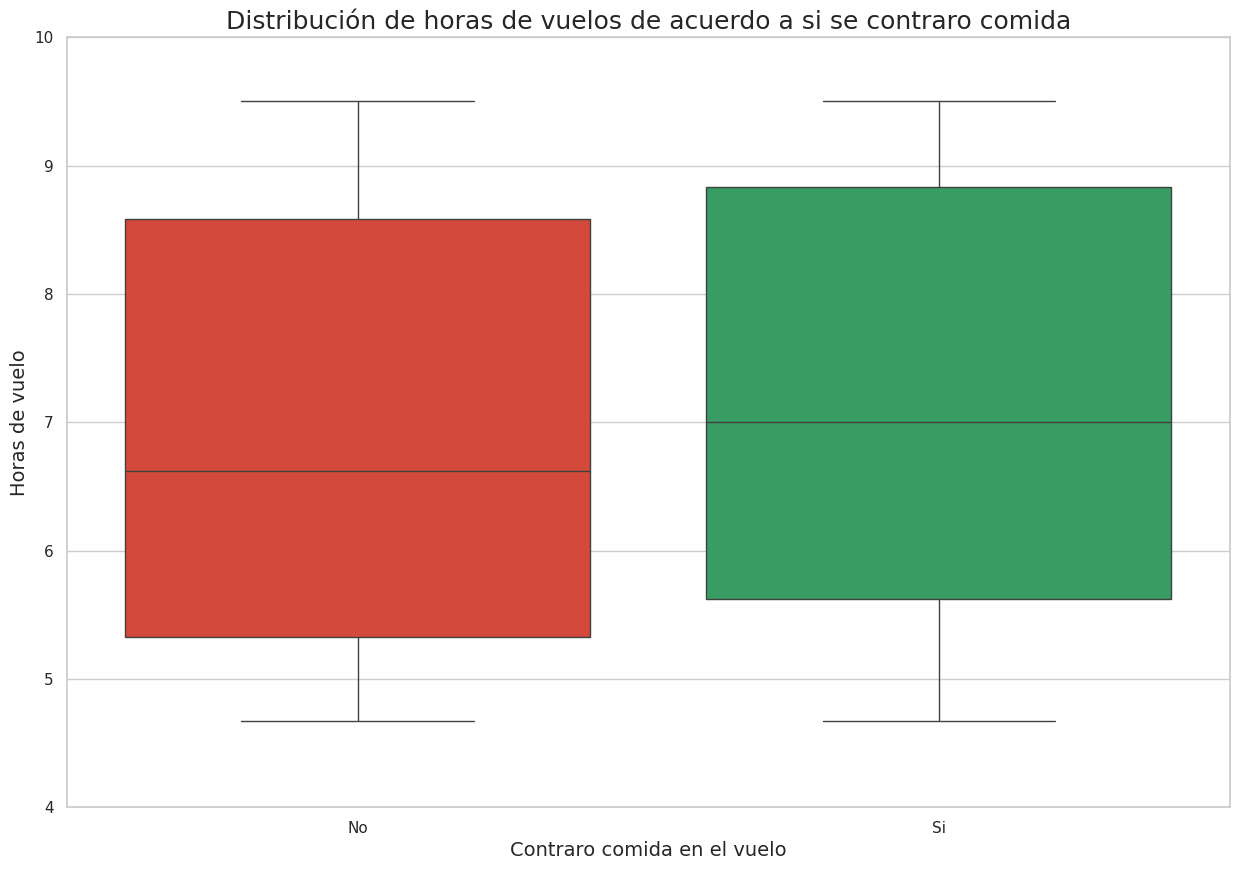

In [ ]:
a = customer_airways_data[customer_airways_data['booking_complete'] == 1]
a['wants_in_flight_meals'] = a['wants_in_flight_meals'] == 1
a = a.replace({True: 'Si', False: 'No'})

colors = {'Si': '#27AE60', 'No': '#EC3422'}

plt.figure(figsize=(15,10))
g=sns.boxplot(x='wants_in_flight_meals',y='flight_duration',data=a, palette=colors)
g.set_title('Distribución de horas de vuelos de acuerdo a si se contraro comida', fontsize=18)
g.set_xlabel('Contraro comida en el vuelo',fontsize=14)
g.set_ylabel('Horas de vuelo',fontsize=14)
g.set_ylim(4,10)

(4.0, 10.0)

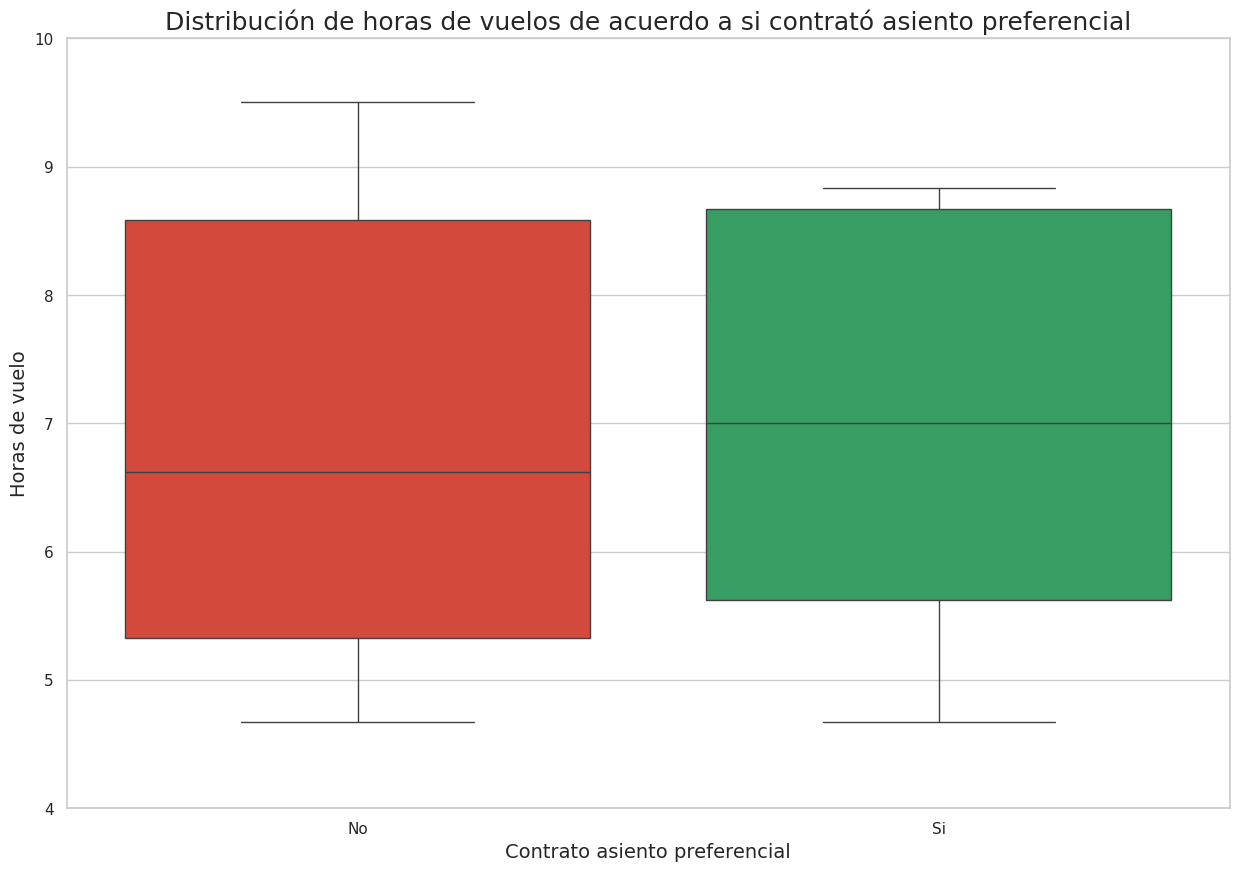

In [ ]:
b = customer_airways_data[customer_airways_data['booking_complete'] == 1]
b['wants_preferred_seat'] = b['wants_preferred_seat'] == 1
b = b.replace({True: 'Si', False: 'No'})

colors = {'Si': '#27AE60', 'No': '#EC3422'}

plt.figure(figsize=(15,10))
g=sns.boxplot(x='wants_preferred_seat',y='flight_duration',data=b, palette=colors)
g.set_title('Distribución de horas de vuelos de acuerdo a si contrató asiento preferencial', fontsize=18)
g.set_xlabel('Contrato asiento preferencial',fontsize=14)
g.set_ylabel('Horas de vuelo',fontsize=14)
g.set_ylim(4,10)

(4.0, 10.0)

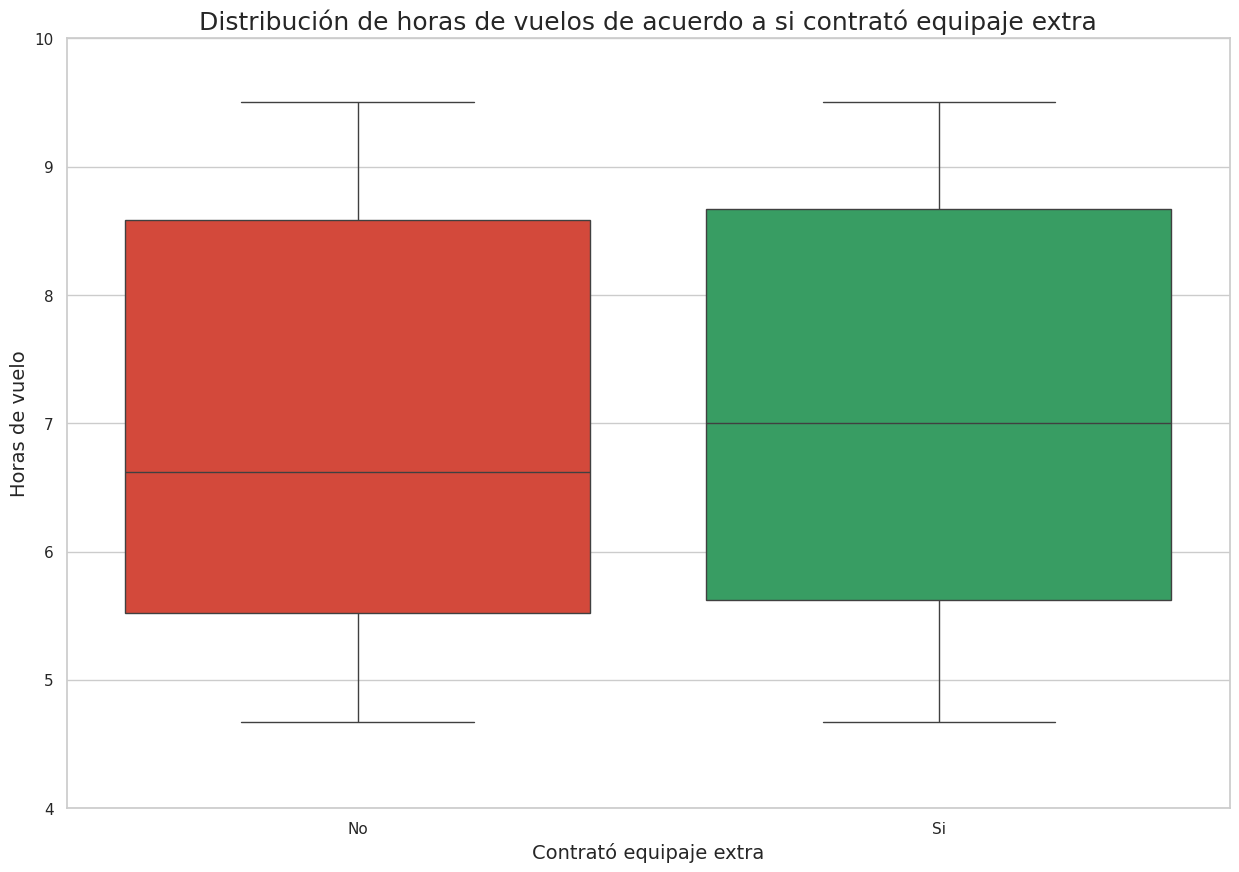

In [ ]:
d = customer_airways_data[customer_airways_data['booking_complete'] == 1]
d['wants_extra_baggage'] = d['wants_extra_baggage'] == 1
d = d.replace({True: 'Si', False: 'No'})

colors = {'Si': '#27AE60', 'No': '#EC3422'}

plt.figure(figsize=(15,10))
g=sns.boxplot(x='wants_extra_baggage',y='flight_duration',data=d, palette=colors)
g.set_title('Distribución de horas de vuelos de acuerdo a si contrató equipaje extra', fontsize=18)
g.set_xlabel('Contrató equipaje extra',fontsize=14)
g.set_ylabel('Horas de vuelo',fontsize=14)
g.set_ylim(4,10)

(1.0, 10.0)

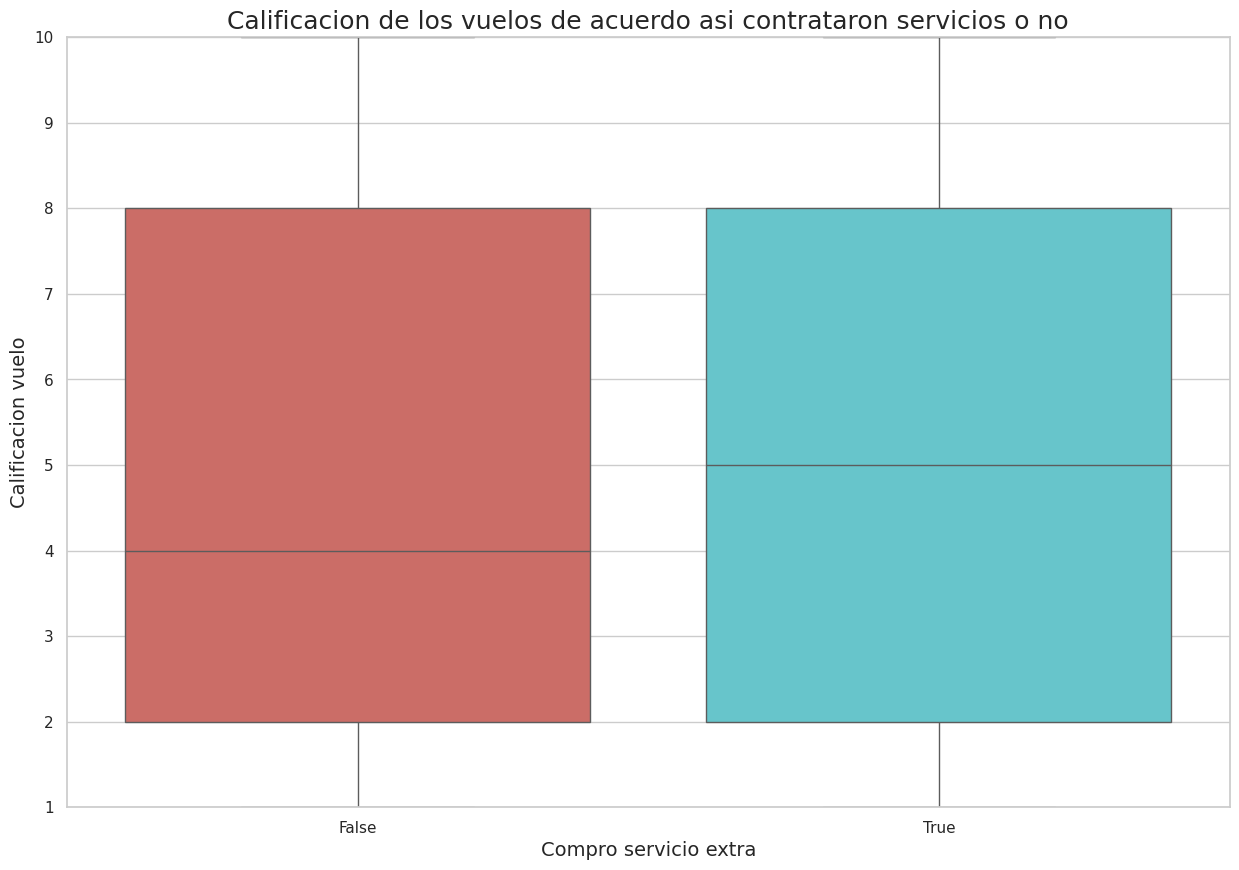

In [ ]:
e=final_df[final_df['booking_complete'] == 1]
e['bought_service'] = (e['wants_extra_baggage'] == 1) | (e['wants_in_flight_meals'] == 1) | (e['wants_preferred_seat'] == 1)
plt.figure(figsize=(15,10))
g=sns.boxplot(x='bought_service',y='rates',data=e, palette='hls')
g.set_title('Calificacion de los vuelos de acuerdo asi contrataron servicios o no', fontsize=18)
g.set_xlabel('Compro servicio extra',fontsize=14)
g.set_ylabel('Calificacion vuelo',fontsize=14)
g.set_ylim(1,10)

El de arriba mucho no va

(1.0, 10.0)

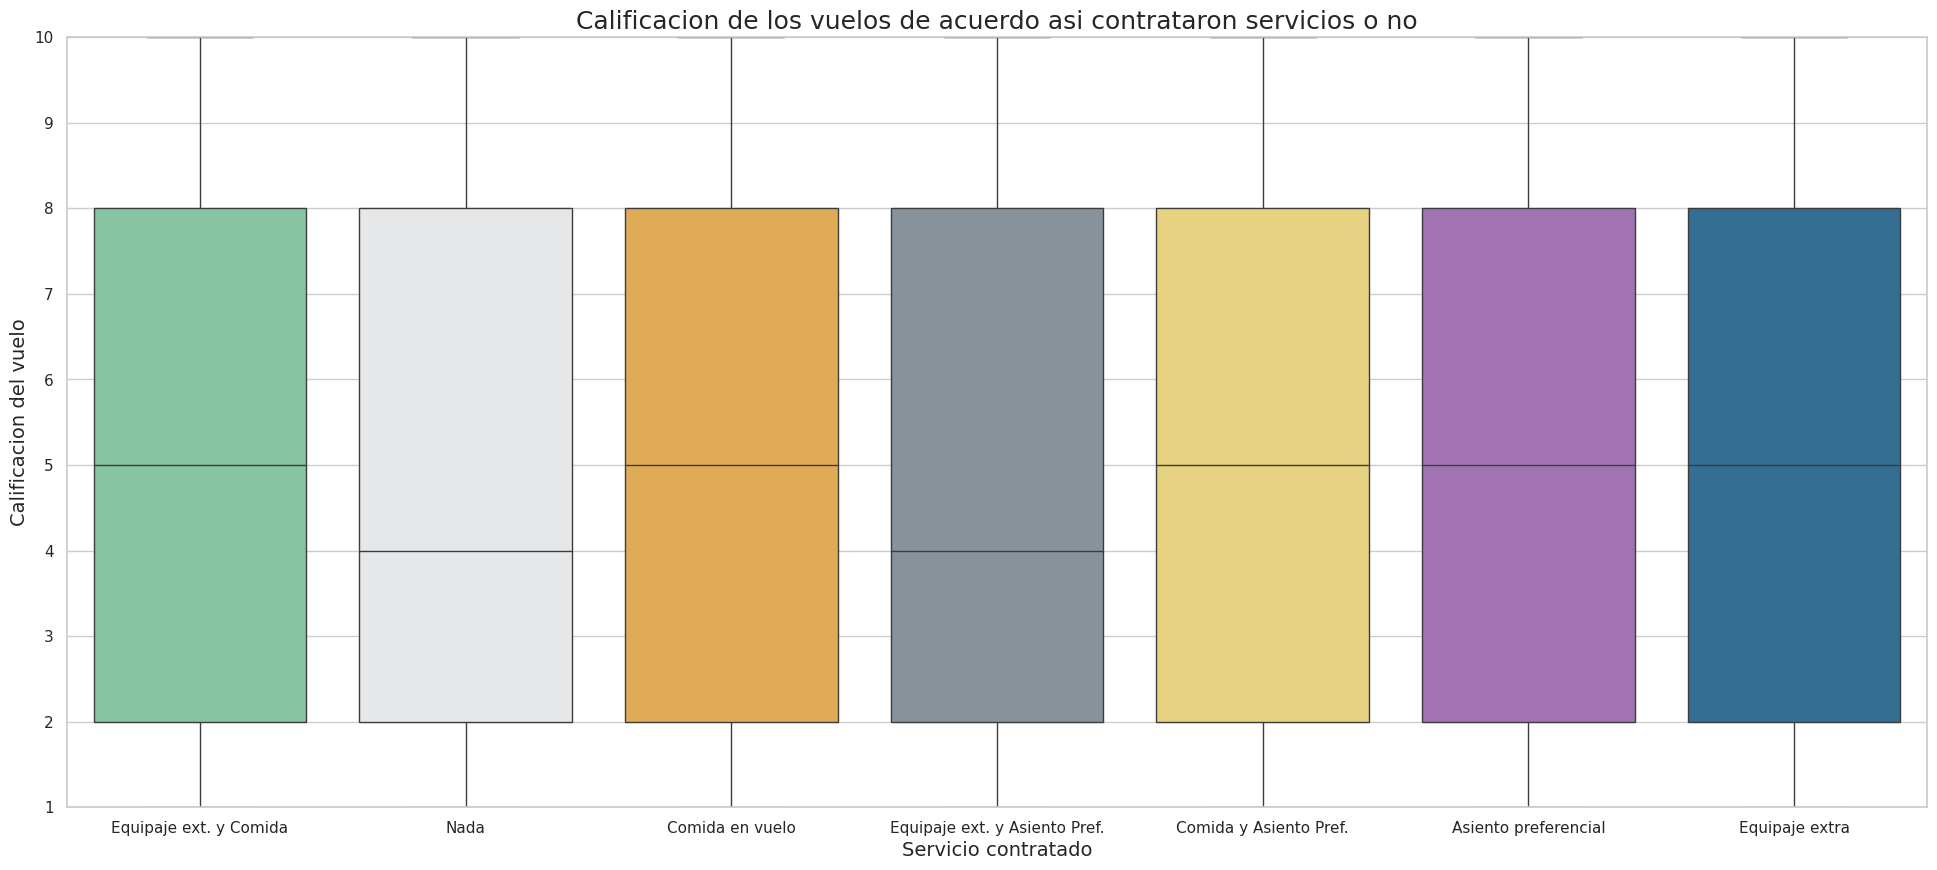

In [ ]:
g=final_df[final_df['booking_complete'] == 1]
g['no_service'] = (g['wants_extra_baggage'] == 0) & (g['wants_in_flight_meals'] == 0) & (g['wants_preferred_seat'] == 0)

g.loc[(g['wants_extra_baggage'] == 1) & (g['wants_in_flight_meals'] == 0) & (g['wants_preferred_seat'] == 0) & (g['no_service'] == 0), 'servicio_pedido'] = 'Equipaje extra'
g.loc[(g['wants_extra_baggage'] == 0) & (g['wants_in_flight_meals'] == 1) & (g['wants_preferred_seat'] == 0) & (g['no_service'] == 0), 'servicio_pedido'] = 'Comida en vuelo'
g.loc[(g['wants_extra_baggage'] == 0) & (g['wants_in_flight_meals'] == 0) & (g['wants_preferred_seat'] == 1) & (g['no_service'] == 0), 'servicio_pedido'] = 'Asiento preferencial'
g.loc[(g['wants_extra_baggage'] == 0) & (g['wants_in_flight_meals'] == 0) & (g['wants_preferred_seat'] == 0) & (g['no_service'] == 1), 'servicio_pedido'] = 'Nada'

g.loc[(g['wants_extra_baggage'] == 1) & (g['wants_in_flight_meals'] == 1) & (g['wants_preferred_seat'] == 0) & (g['no_service'] == 0), 'servicio_pedido'] = 'Equipaje ext. y Comida'
g.loc[(g['wants_extra_baggage'] == 1) & (g['wants_in_flight_meals'] == 0) & (g['wants_preferred_seat'] == 1) & (g['no_service'] == 0), 'servicio_pedido'] = 'Equipaje ext. y Asiento Pref.'
g.loc[(g['wants_extra_baggage'] == 0) & (g['wants_in_flight_meals'] == 1) & (g['wants_preferred_seat'] == 1) & (g['no_service'] == 0), 'servicio_pedido'] = 'Comida y Asiento Pref.'

colors = {'Equipaje extra': '#2471A3',
          'Comida en vuelo': '#F5B041',
          'Asiento preferencial': '#A569BD',
          'Nada': '#E5E7E9',
          'Equipaje ext. y Comida': '#7DCEA0',
          'Equipaje ext. y Asiento Pref.': '#85929E',
          'Comida y Asiento Pref.': '#F7DC6F'}

plt.figure(figsize=(24,10))
g=sns.boxplot(x='servicio_pedido',y='rates',data=g, palette=colors)
g.set_title('Calificacion de los vuelos de acuerdo asi contrataron servicios o no', fontsize=18)
g.set_xlabel('Servicio contratado',fontsize=14)
g.set_ylabel('Calificacion del vuelo',fontsize=14)
g.set_yticks(range(1,11))
g.set_ylim(1,10)

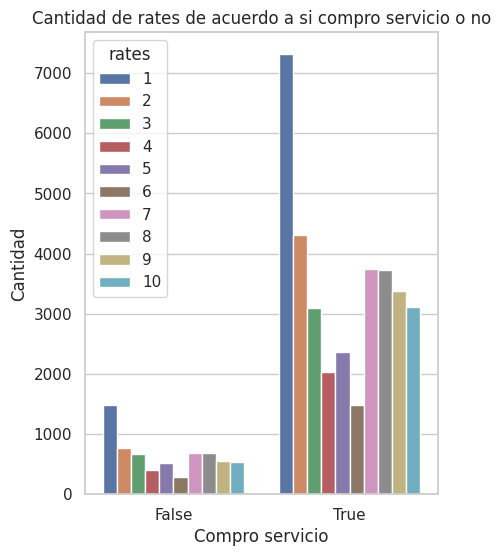

In [ ]:
e=final_df[final_df['booking_complete'] == 1]
e['bought_service'] = (e['wants_extra_baggage'] == 1) | (e['wants_in_flight_meals'] == 1) | (e['wants_preferred_seat'] == 1)
rates = ['rates']
for i in range(len(rates)):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,i+1)
    plt.xlabel(rates[i])

plt.title('Cantidad de rates de acuerdo a si compro servicio o no')
sns.countplot(data=e, x='bought_service', hue='rates', palette='deep')
plt.xlabel("Compro servicio")
plt.ylabel("Cantidad")
plt.show()

Hacer violinplot del de arriba (hecho)

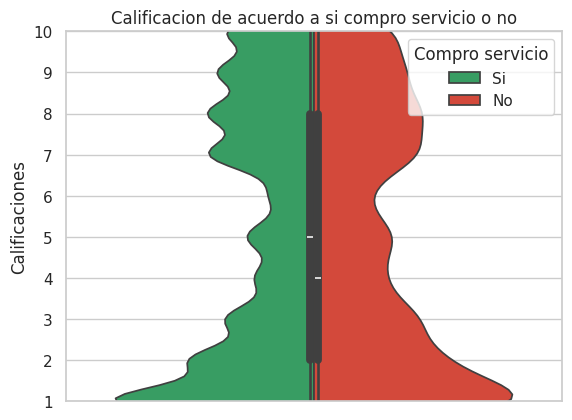

In [ ]:
e=final_df[final_df['booking_complete'] == 1]
e['bought_service'] = (e['wants_extra_baggage'] == 1) | (e['wants_in_flight_meals'] == 1) | (e['wants_preferred_seat'] == 1)
e['bought_service'] = e['bought_service'].replace({True: 'Si', False: 'No'})

colors = {'Si': '#27AE60', 'No': '#EC3422'}

sns.violinplot(y = "rates", hue="bought_service", data=e, split=True, palette=colors)
plt.title('Calificacion de acuerdo a si compro servicio o no')
plt.ylabel('Calificaciones')
plt.ylim(1,10)
#plt.xlim(-1,1)
plt.legend(title = "Compro servicio")
plt.show()

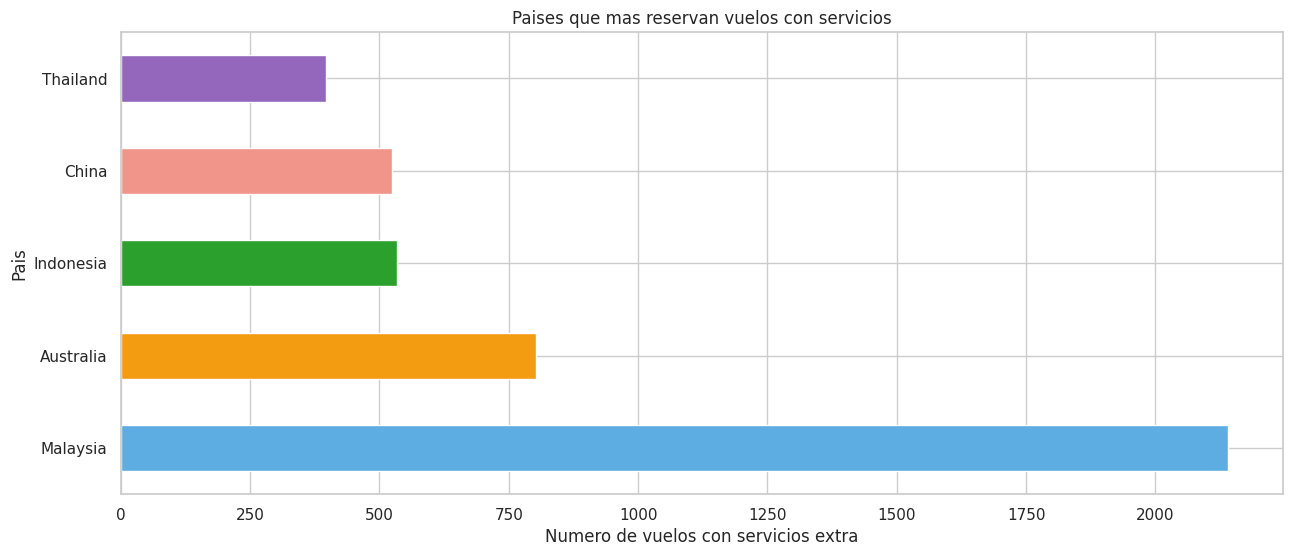

In [ ]:
f=customer_airways_data[customer_airways_data['booking_complete'] == 1]
f['bought_service'] = (f['wants_extra_baggage'] == 1) | (f['wants_in_flight_meals'] == 1) | (f['wants_preferred_seat'] == 1)
g = f.groupby('booking_origin')['bought_service'].sum().nlargest(5)

colors = ['#5DADE2', '#F39C12', '#2ca02c', '#F1948A', '#9467bd']

g.plot(kind='barh', figsize=(15,6), color=colors)
plt.title('Paises que mas reservan vuelos con servicios')
plt.xlabel('Numero de vuelos con servicios extra')
plt.ylabel('Pais')
plt.show()


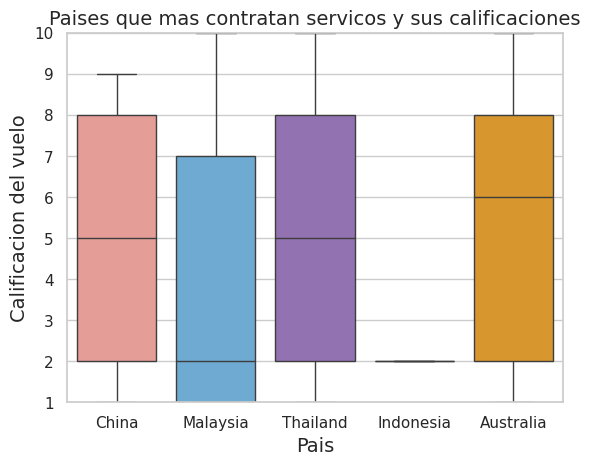

In [ ]:
f=final_df[final_df['booking_complete'] == 1]
f = f.loc[(f['booking_origin'] == 'Malaysia') | (f['booking_origin'] == 'Australia') | (f['booking_origin'] == 'Indonesia') | (f['booking_origin'] == 'China') | (f['booking_origin'] == 'Thailand'), ['rates', 'booking_origin']]

colors = {'Malaysia': '#5DADE2',
          'Australia': '#F39C12',
          'Indonesia': '#2ca02c',
          'China': '#F1948A',
          'Thailand': '#9467bd'}

g=sns.boxplot(x='booking_origin',y='rates',data=f, palette=colors)
g.set_title('Paises que mas contratan servicos y sus calificaciones', fontsize=14)
g.set_xlabel('Pais',fontsize=14)
g.set_ylabel('Calificacion del vuelo',fontsize=14)
g.set_ylim(1,10)
g.set_yticks(range(1,11))


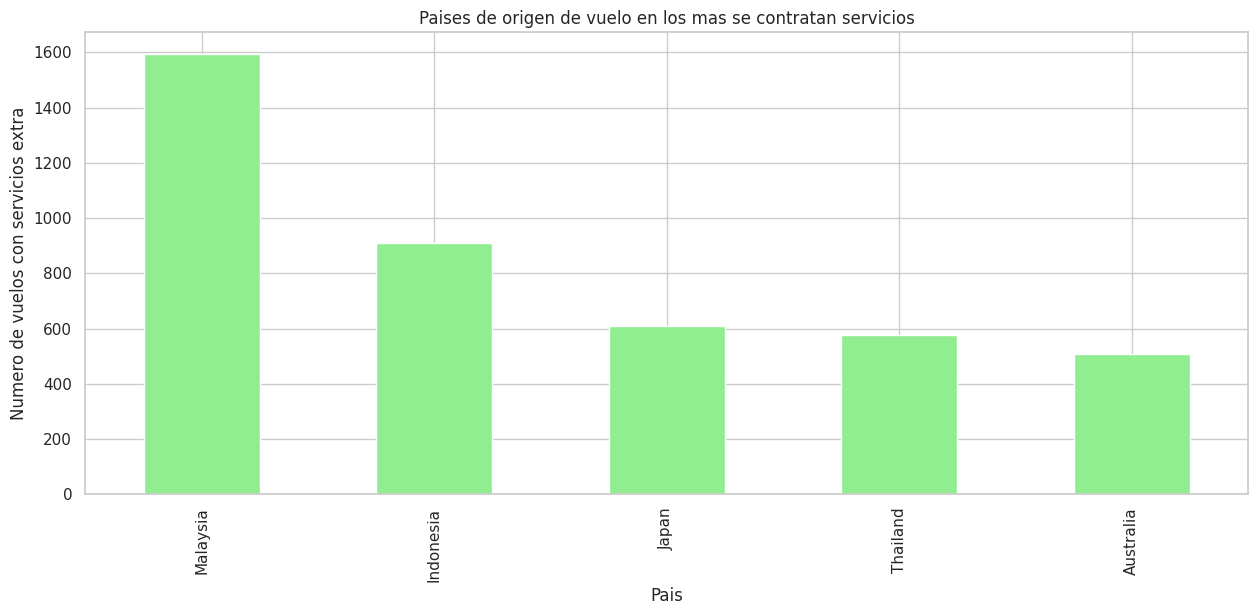

In [ ]:
f=customer_airways_data[customer_airways_data['booking_complete'] == 1]
f['bought_service'] = (f['wants_extra_baggage'] == 1) | (f['wants_in_flight_meals'] == 1) | (f['wants_preferred_seat'] == 1)
g = f.groupby('flight_origin')['bought_service'].sum().nlargest(5)
g.plot(kind='bar', figsize=(15,6), color='lightgreen')
plt.title('Paises de origen de vuelo en los mas se contratan servicios')
plt.xlabel('Pais')
plt.ylabel('Numero de vuelos con servicios extra')
plt.show()

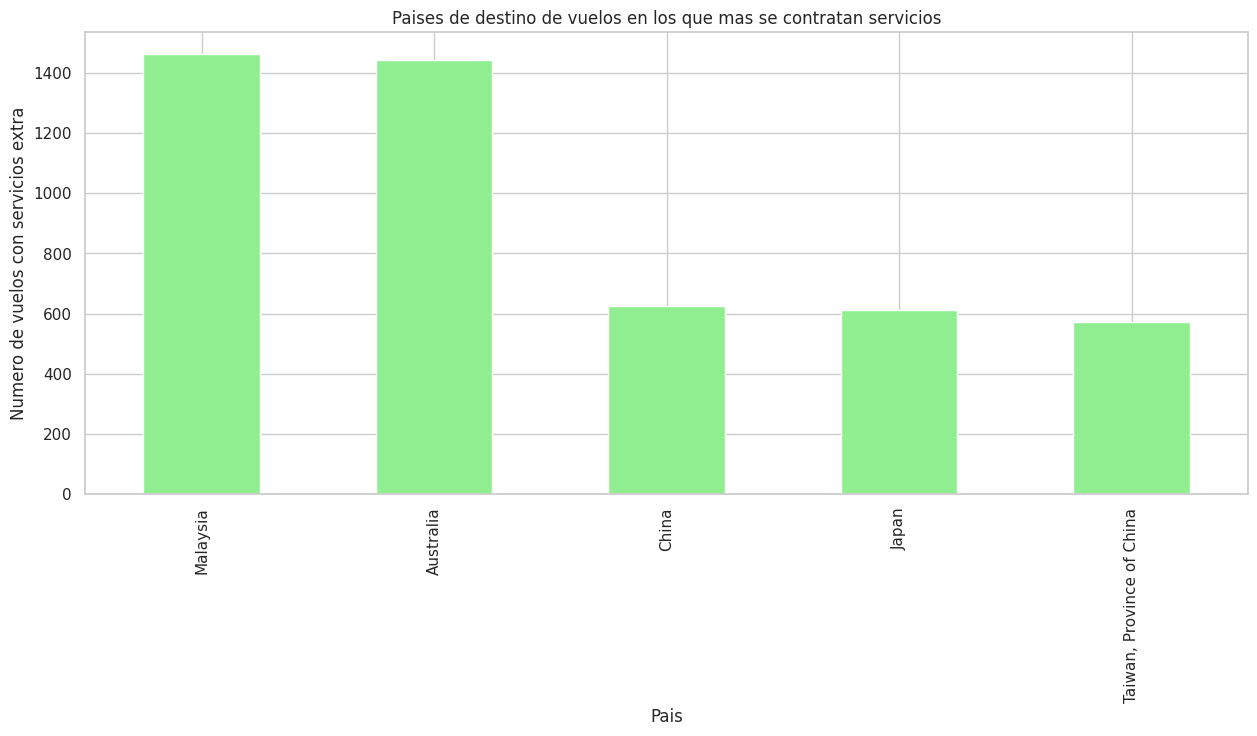

In [ ]:
f=customer_airways_data[customer_airways_data['booking_complete'] == 1]
f['bought_service'] = (f['wants_extra_baggage'] == 1) | (f['wants_in_flight_meals'] == 1) | (f['wants_preferred_seat'] == 1)
g = f.groupby('flight_destiny')['bought_service'].sum().nlargest(5)
g.plot(kind='bar', figsize=(15,6), color='lightgreen')
plt.title('Paises de destino de vuelos en los que mas se contratan servicios')
plt.xlabel('Pais')
plt.ylabel('Numero de vuelos con servicios extra')
plt.show()

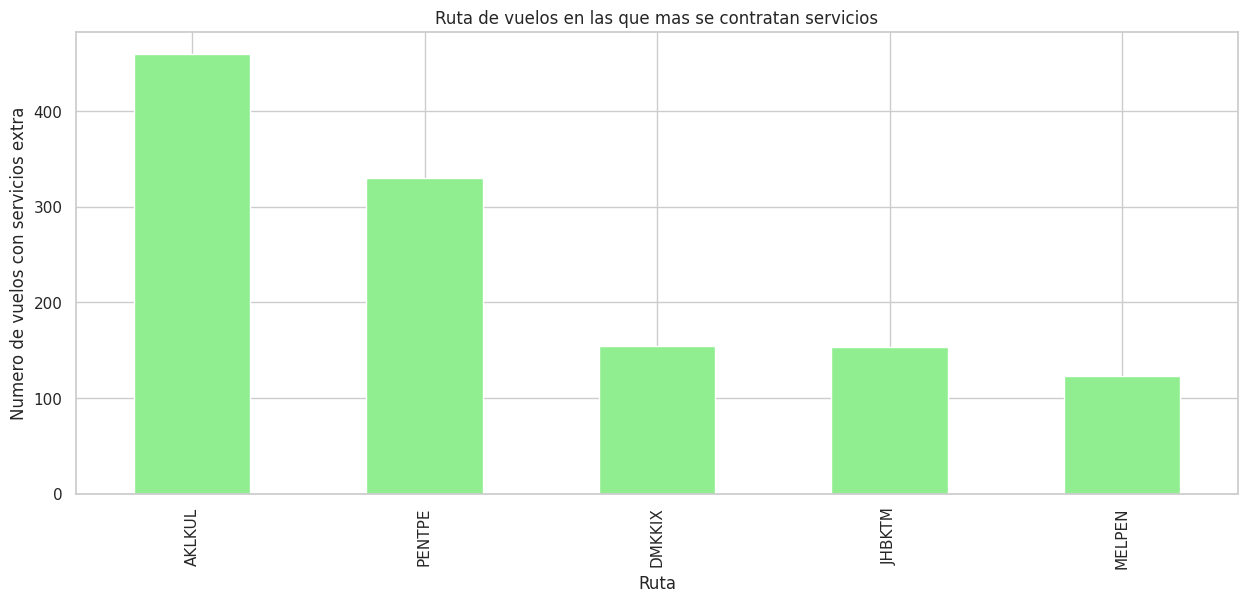

In [ ]:
f=customer_airways_data[customer_airways_data['booking_complete'] == 1]
f['bought_service'] = (f['wants_extra_baggage'] == 1) | (f['wants_in_flight_meals'] == 1) | (f['wants_preferred_seat'] == 1)
g = f.groupby('route')['bought_service'].sum().nlargest(5)
g.plot(kind='bar', figsize=(15,6), color='lightgreen')
plt.title('Ruta de vuelos en las que mas se contratan servicios')
plt.xlabel('Ruta')
plt.ylabel('Numero de vuelos con servicios extra')
plt.show()

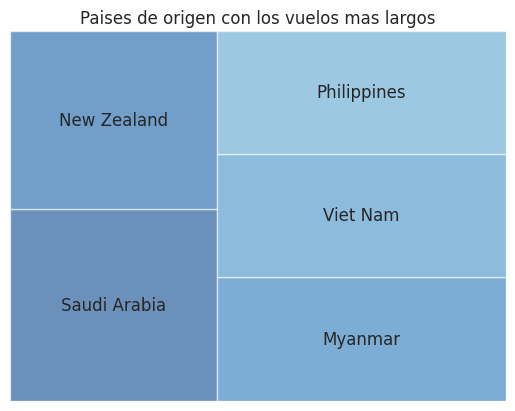

In [ ]:
i=final_df[final_df['booking_complete'] == 1]
j = i.groupby(['flight_origin'])['flight_duration'].mean().nlargest(5)
squarify.plot(j, alpha=0.6, label=['Saudi Arabia', 'New Zealand','Myanmar','Viet Nam','Philippines'],color=sns.color_palette('Blues_r',10))
plt.title('Paises de origen con los vuelos mas largos')
plt.axis('off')
plt.show()

Probar agrupar por continente o algo (Falta hacer)

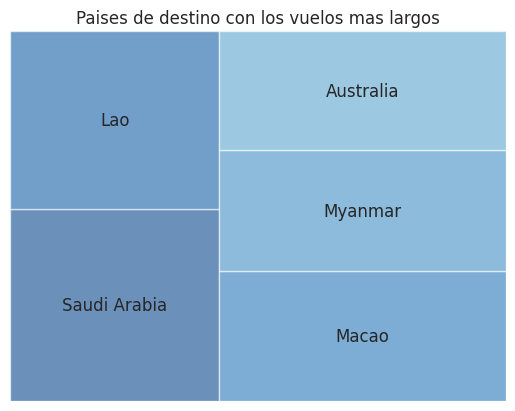

In [ ]:
i=final_df[final_df['booking_complete'] == 1]
j = i.groupby(['flight_destiny'])['flight_duration'].mean().nlargest(5)
squarify.plot(j, alpha=0.6, label=['Saudi Arabia', 'Lao','Macao','Myanmar','Australia'],color=sns.color_palette('Blues_r',10))
plt.title('Paises de destino con los vuelos mas largos')
plt.axis('off')
plt.show()

Modificar estos treemap para que muestren la informacion por continente asi es mas interesante (Falta Hacer)

Probar agrupar por continente o algo (Falta hacer)

In [ ]:
i=final_df[final_df['booking_complete'] == 1]
j = i.groupby(['route'])['flight_duration'].mean().nlargest(5)
j

route
CGKJED                   9.50
JEDPEN                   9.50
AKLKUL                   8.83
AORMEL                   8.83
BDOMEL                   8.83
Name: flight_duration, dtype: float64

(1.0, 10.0)

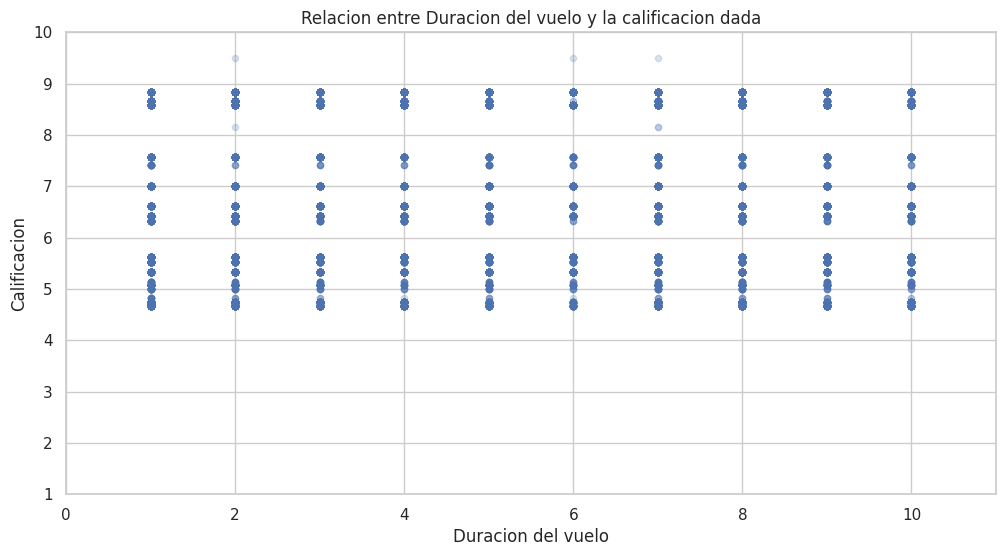

In [ ]:
d = final_df[final_df['booking_complete'] == 1]
#d = d.groupby('flight_duration')['rates'].mean().to_frame().reset_index()
d.plot.scatter('rates','flight_duration', figsize=(12,6), alpha = 0.2)
plt.xlabel('Duracion del vuelo')
plt.ylabel('Calificacion')
plt.title('Relacion entre Duracion del vuelo y la calificacion dada')
plt.xlim(0,11)
plt.ylim(1,10)

Usar opacidad y no usar groupby (Hecho)

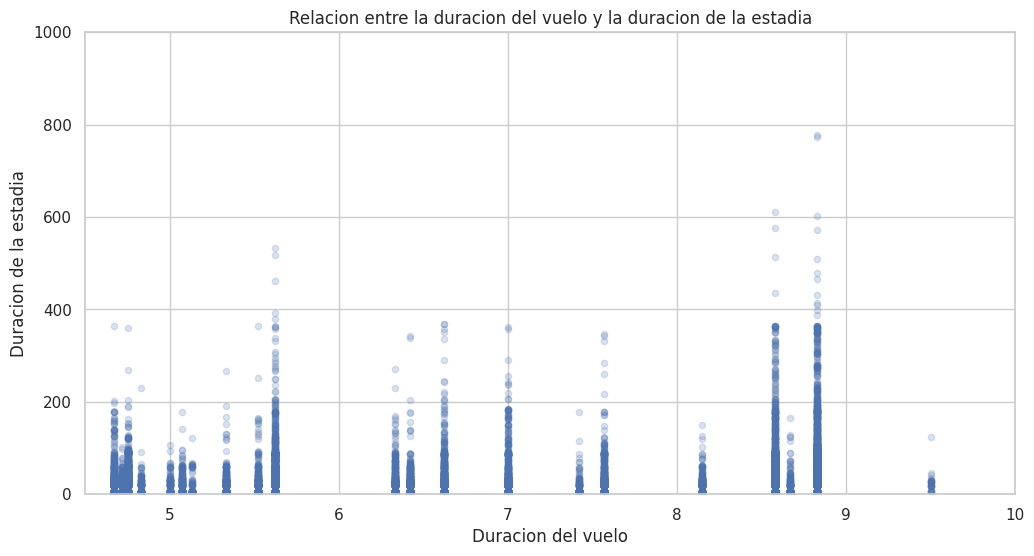

In [ ]:
d = customer_airways_data#.groupby('flight_duration')['length_of_stay'].mean().to_frame().reset_index()
d.plot.scatter('flight_duration','length_of_stay', figsize=(12,6), alpha=0.2)
plt.xlabel('Duracion del vuelo')
plt.ylabel('Duracion de la estadia')
plt.title('Relacion entre la duracion del vuelo y la duracion de la estadia')
plt.xlim(4.5,10)
plt.ylim(0,1000)
plt.show()

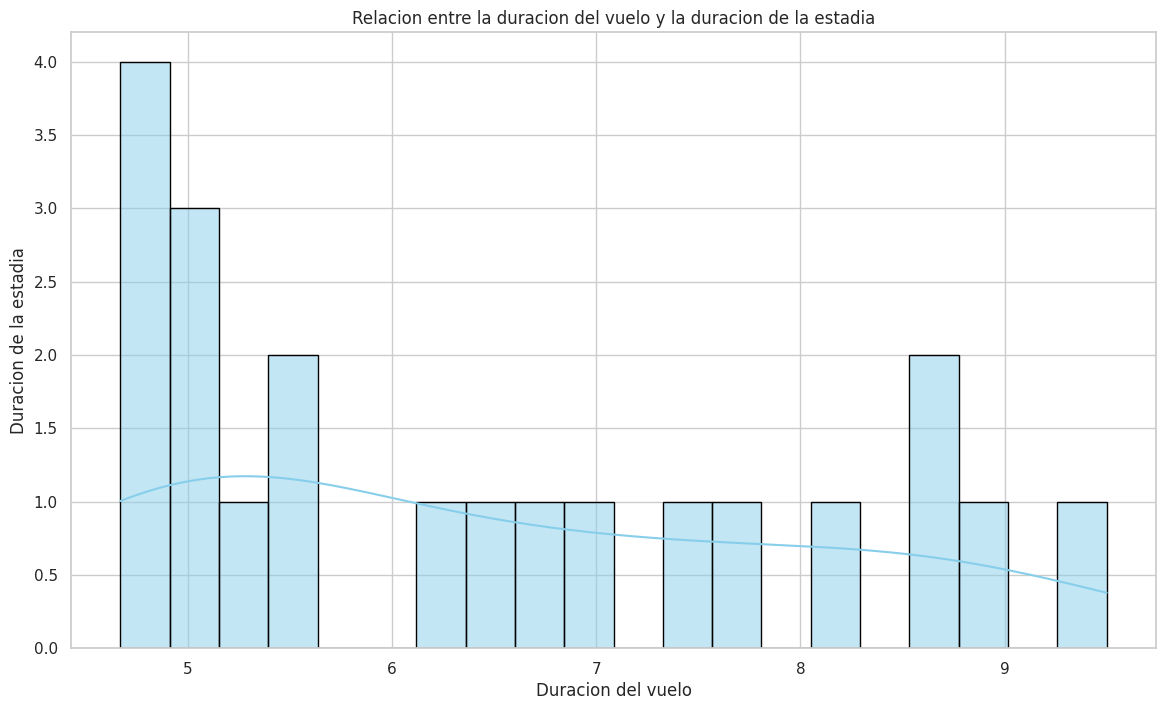

In [ ]:
d = d.groupby('flight_duration')['length_of_stay'].mean().to_frame().reset_index()

plt.figure(figsize=(14, 8))
sns.histplot(d['flight_duration'], bins=20,color='skyblue',kde=True ,edgecolor='black')

plt.xlabel('Duracion del vuelo')
plt.ylabel('Duracion de la estadia')
plt.title('Relacion entre la duracion del vuelo y la duracion de la estadia')

plt.show()

histograma? mm



(0.0, 3500.0)

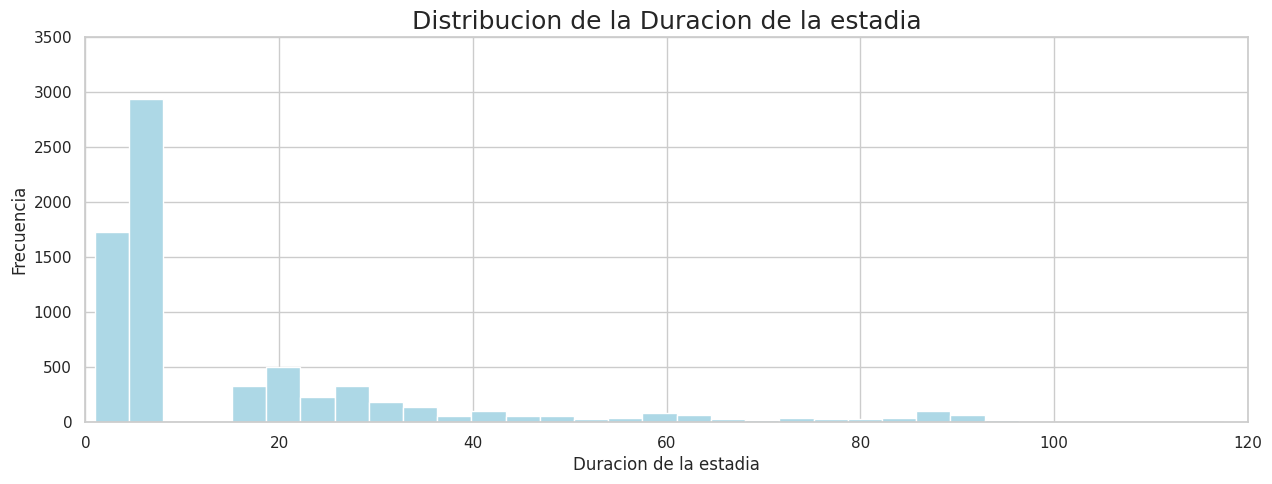

In [ ]:
g = customer_airways_data[customer_airways_data['booking_complete'] == 1]
g = g['length_of_stay'].plot.hist(figsize=(15,5),color='lightblue', bins=220)
g.set_title('Distribucion de la Duracion de la estadia', fontsize=18)
g.set_xlabel('Duracion de la estadia')
g.set_ylabel('Frecuencia')
g.set_xlim(0,120)
g.set_ylim(0,3500)

In [ ]:
customer_airways_data['purchase_lead'].nlargest()

48259    867
24119    704
835      641
38356    633
39417    625
Name: purchase_lead, dtype: int64

(0.0, 800.0)

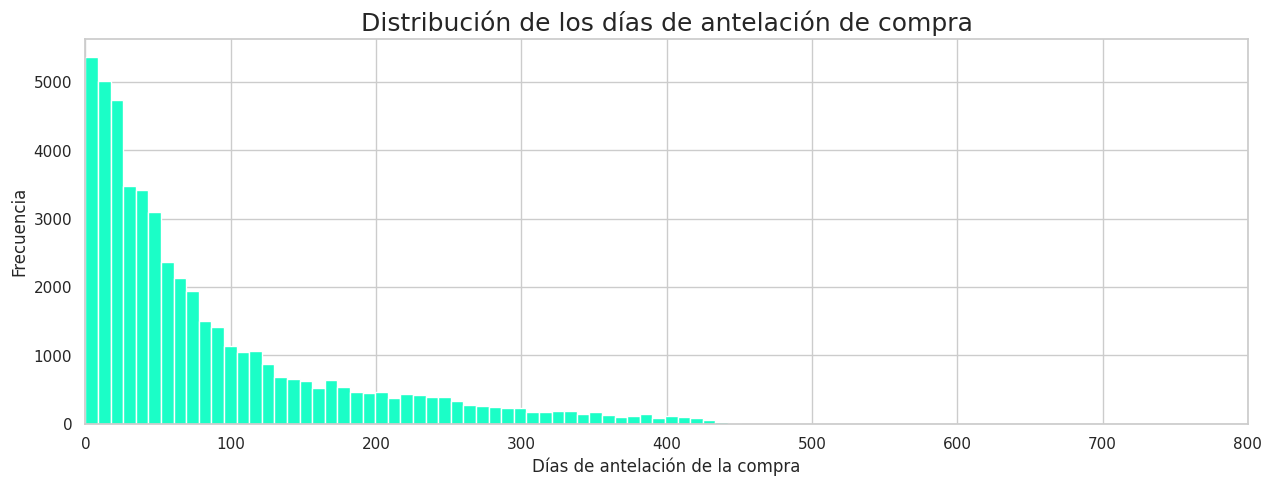

In [ ]:
g=customer_airways_data['purchase_lead'].plot.hist(figsize=(15,5), color='#1BFEC7', bins=100)
g.set_title('Distribución de los días de antelación de compra', fontsize=18)
g.set_xlabel('Días de antelación de la compra')
g.set_ylabel('Frecuencia')
g.set_xlim(0,800)

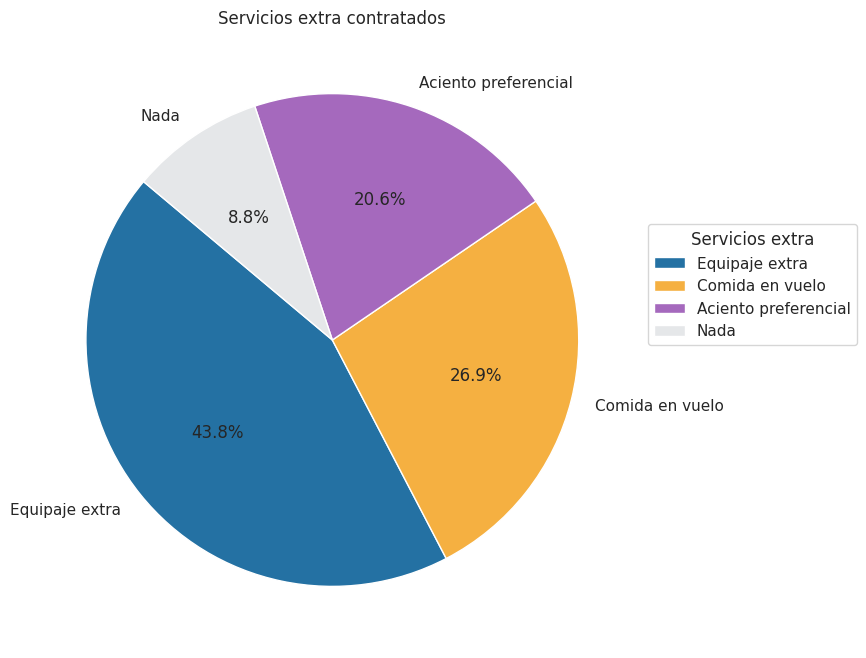

In [ ]:
a = customer_airways_data[customer_airways_data['booking_complete'] == 1]
a['no_service'] = (a['wants_extra_baggage'] == 0) & (a['wants_in_flight_meals'] == 0) & (a['wants_preferred_seat'] == 0)
baggage = a.loc[a['wants_extra_baggage'] == 1, 'wants_extra_baggage']
meal = a.loc[a['wants_in_flight_meals'] == 1, 'wants_in_flight_meals']
seat = a.loc[a['wants_preferred_seat'] == 1, 'wants_preferred_seat']
nothing = a.loc[a['no_service'] == True, 'no_service']

baggage = baggage.replace({1: 'Equipaje extra'})
meal = meal.replace({1: 'Comida en vuelo'})
seat = seat.replace({1: 'Aciento preferencial'})
nothing = nothing.replace({True: 'Nada'})

all_services = pd.concat([baggage, meal, seat, nothing])
value_counts = all_services.value_counts()
service_percent = (value_counts / len(all_services)) * 100
t = pd.DataFrame({'all_services': value_counts.index, 'service_percent': service_percent.values}).reset_index(drop=True)
t

colors = ['#2471A3', '#F5B041', '#A569BD', '#E5E7E9']
plt.figure(figsize=(8, 8))
plt.pie(t['service_percent'], labels=t['all_services'], autopct='%1.1f%%', startangle=140, colors = colors)

plt.title('Servicios extra contratados')
plt.legend(title='Servicios extra', loc='best', bbox_to_anchor=(1.0, 0.7))
plt.show()

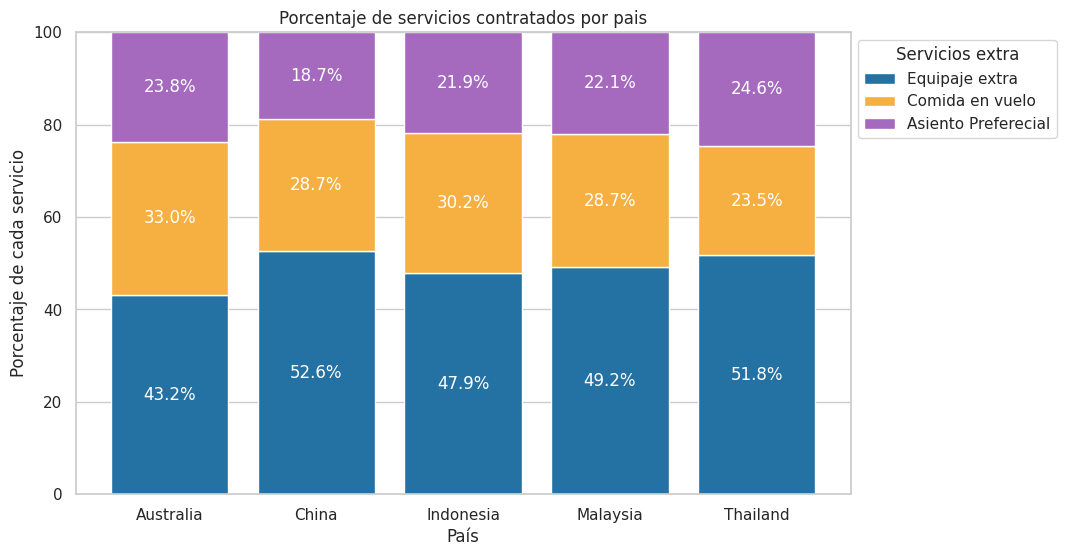

In [ ]:
f=customer_airways_data[customer_airways_data['booking_complete'] == 1]
f['no_service'] = (f['wants_extra_baggage'] == 0) & (f['wants_in_flight_meals'] == 0) & (f['wants_preferred_seat'] == 0)
f = f.loc[((f['booking_origin'] == 'Malaysia') | (f['booking_origin'] == 'Australia') | (f['booking_origin'] == 'Indonesia') | (f['booking_origin'] == 'China') | (f['booking_origin'] == 'Thailand')), \
            ['booking_origin', 'wants_extra_baggage', 'wants_in_flight_meals', 'wants_preferred_seat']]
f = f.groupby('booking_origin').sum().reset_index()
f['total_service'] = f['wants_extra_baggage'] + f['wants_in_flight_meals'] + f['wants_preferred_seat']

f['wants_extra_baggage'] = f['wants_extra_baggage']/f['total_service'] * 100
f['wants_in_flight_meals'] = f['wants_in_flight_meals']/f['total_service'] * 100
f['wants_preferred_seat'] = f['wants_preferred_seat']/f['total_service'] * 100
del f['total_service']

plt.figure(figsize=(10, 6))

a = plt.bar(f['booking_origin'], f['wants_extra_baggage'], label='Equipaje extra', color='#2471A3')
b = plt.bar(f['booking_origin'], f['wants_in_flight_meals'], bottom=f['wants_extra_baggage'], label='Comida en vuelo', color = '#F5B041')
c = plt.bar(f['booking_origin'], f['wants_preferred_seat'], bottom=f['wants_extra_baggage'] + f['wants_in_flight_meals'], label='Asiento Preferecial', color = '#A569BD')

plt.bar_label(a, labels=[f'{p:.1f}%' for p in (f['wants_extra_baggage'])], label_type='center', color='white')
plt.bar_label(b, labels=[f'{p:.1f}%' for p in (f['wants_in_flight_meals'])], label_type='center', color='white')
plt.bar_label(c, labels=[f'{p:.1f}%' for p in (f['wants_preferred_seat'])], label_type='center', color='white')

plt.xlabel('País')
plt.ylabel('Porcentaje de cada servicio')
plt.title('Porcentaje de servicios contratados por pais')
plt.ylim(0,100)
plt.legend(title='Servicios extra', loc='best', bbox_to_anchor=(1.0, 1.0))
plt.show()

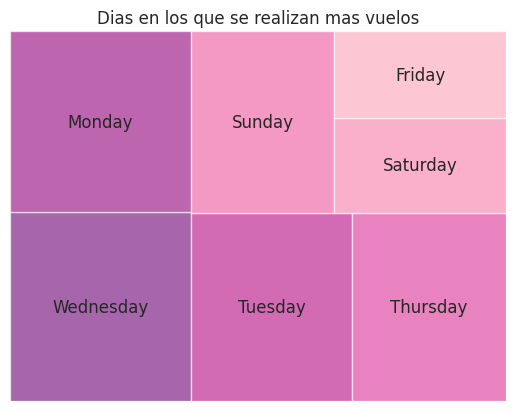

In [ ]:
w = final_df['flight_day']
w = w.value_counts()
squarify.plot(w, alpha=0.6, label=['Wednesday', 'Monday','Tuesday','Thursday','Sunday', 'Saturday', 'Friday'],color=sns.color_palette('RdPu',10)[::-1])
plt.title('Dias en los que se realizan mas vuelos')
plt.axis('off')
plt.show()

Este treemap esta bien

In [ ]:
x = final_df[final_df['booking_complete'] == 0]
x['flight_destiny'].value_counts().nlargest(5)

flight_destiny
Australia                    298340
Malaysia                      31133
Viet Nam                      27143
Taiwan, Province of China     20264
China                         17653
Name: count, dtype: int64

In [ ]:
x = customer_airways_data[customer_airways_data['booking_complete'] == 1]
x = x.loc[(x['flight_destiny'] == 'Australia') | (x['flight_destiny'] == 'Malaysia') | (x['flight_destiny'] == 'Viet Nam') | (x['flight_destiny'] == 'Taiwan, Province of China') | (x['flight_destiny'] == 'China'), \
          ['flight_origin','flight_destiny', 'flight_duration']]

mapa_colores = {
    'Australia': '#F39C12',
    'Malaysia': '#5DADE2',
    'Viet Nam': '#C39BD3',
    'Taiwan, Province of China': '#D7DBDD',
    'China': '#F1948A'
}

import plotly.express as px
fig=px.treemap(x, path=[px.Constant('Destino de vuelos mas populares y desde donde salen'), 'flight_destiny', 'flight_origin'], maxdepth=3, color='flight_destiny', color_discrete_map=mapa_colores)
fig.update_traces(root_color='black')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

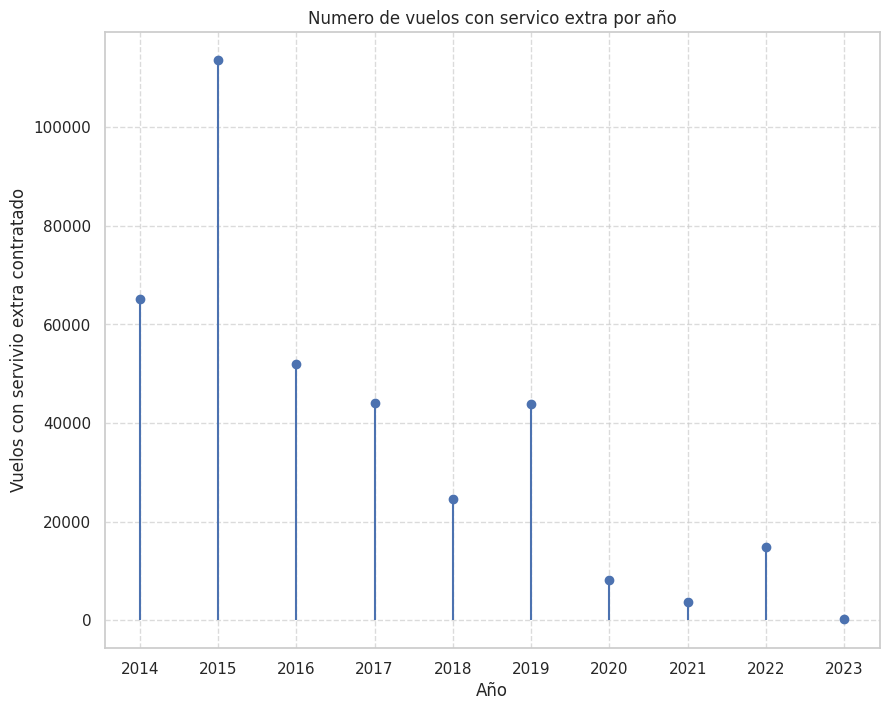

In [ ]:
a = final_df[final_df['booking_complete'] == 0]
a['bought_service'] = (a['wants_extra_baggage'] == 1) | (a['wants_in_flight_meals'] == 1) | (a['wants_preferred_seat'] == 1)
a['flight_year'] = a['date'].dt.year
a = a.groupby('flight_year')['bought_service'].sum().reset_index()

plt.figure(figsize=(10, 8))
plt.stem(a['flight_year'], a['bought_service'], linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Año')
plt.ylabel('Vuelos con servivio extra contratado')
plt.title('Numero de vuelos con servico extra por año')
plt.xticks(a['flight_year'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Hacer histograma del de arriba (Falta hacer)

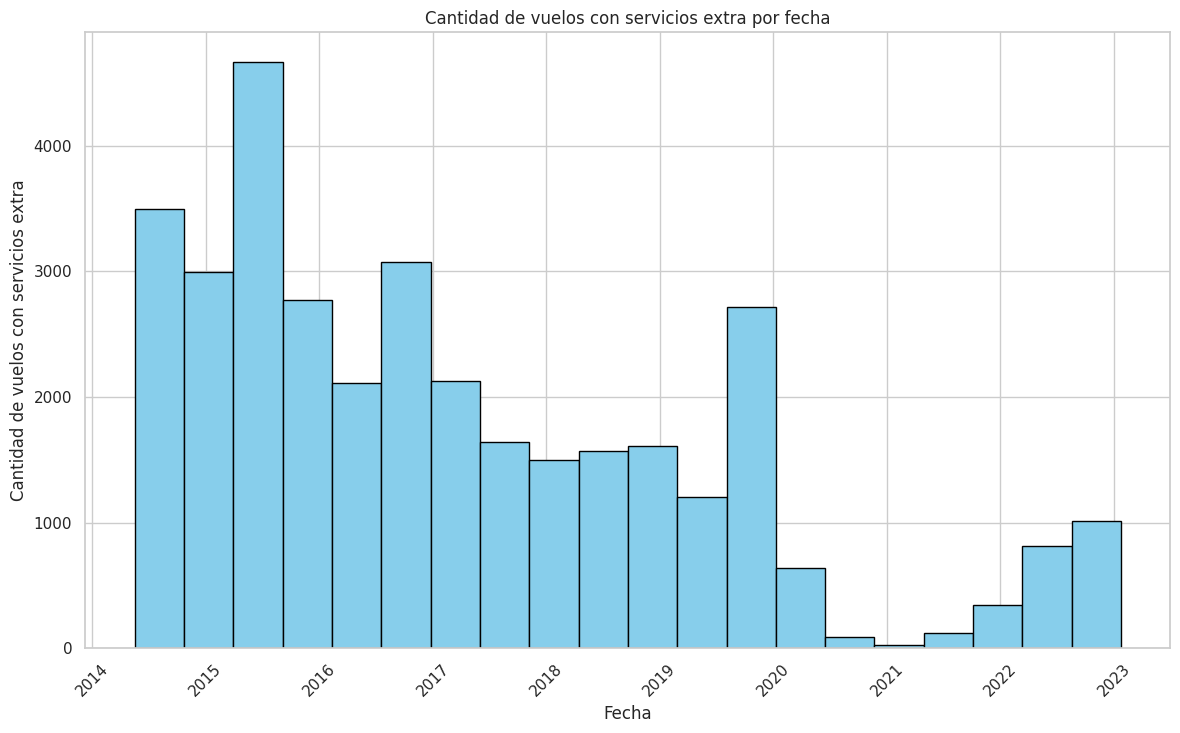

In [ ]:
a = final_df[final_df['booking_complete'] == 1]
a['bought_service'] = (a['wants_extra_baggage'] == 1) | (a['wants_in_flight_meals'] == 1) | (a['wants_preferred_seat'] == 1)
a = a.groupby('date')['bought_service'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.hist(a['date'], bins=20, weights=a['bought_service'], color='skyblue', edgecolor='black')

plt.title('Cantidad de vuelos con servicios extra por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vuelos con servicios extra')


plt.xticks(rotation=45)

plt.show()

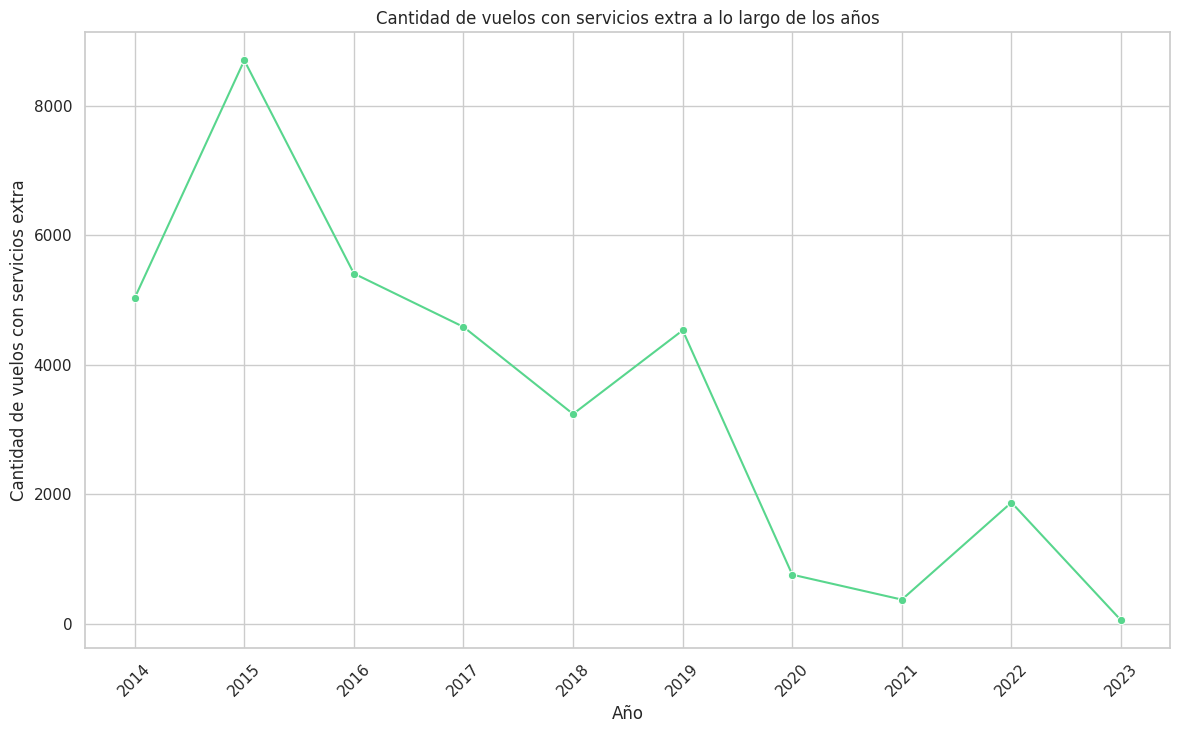

In [ ]:
a = final_df[final_df['booking_complete'] == 1]
a['bought_service'] = (a['wants_extra_baggage'] == 1) | (a['wants_in_flight_meals'] == 1) | (a['wants_preferred_seat'] == 1)

a['year'] = a['date'].dt.year
a = a.groupby('year')['bought_service'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=a, x='year', y='bought_service', marker='o', color='#58D68D')

plt.title('Cantidad de vuelos con servicios extra a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos con servicios extra')

plt.xticks(a['year'], rotation=45)
plt.show()

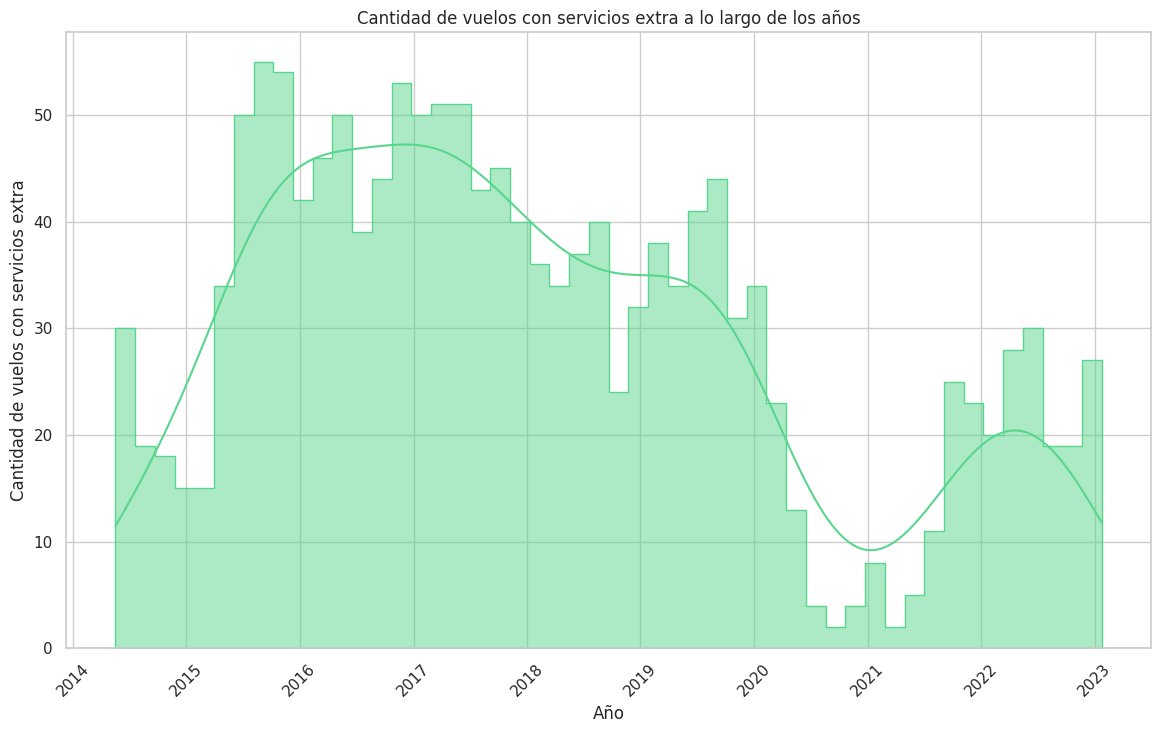

In [ ]:
a = final_df[final_df['booking_complete'] == 1]
a['bought_service'] = (a['wants_extra_baggage'] == 1) | (a['wants_in_flight_meals'] == 1) | (a['wants_preferred_seat'] == 1)
a = a.groupby('date')['bought_service'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.histplot(a['date'], bins=50,color='#58D68D',kde=True , element="step")

plt.title('Cantidad de vuelos con servicios extra a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos con servicios extra')
plt.xticks(rotation=45)

plt.show()


Cada fila es una reserva

In [ ]:
w = customer_airways_data[customer_airways_data['booking_complete'] == 1]
w['route'].value_counts().head(5)

route
AKLKUL    559
PENTPE    396
DMKKIX    185
JHBKTM    163
MELPEN    136
Name: count, dtype: int64

In [ ]:
d = customer_airways_data[customer_airways_data['booking_complete'] == 1]
d = d.loc[(d['route'] == 'AKLKUL') | (d['route'] == 'PENTPE') | (d['route'] == 'DMKKIX') | (d['route'] == 'JHBKTM') | (d['route'] == 'MELPEN'), :]
d = d.groupby('route')['flight_duration'].mean().reset_index()
d

,route,flight_duration
0,AKLKUL,8.83
1,DMKKIX,7.00
2,JHBKTM,4.75
3,MELPEN,8.83
4,PENTPE,4.67


In [ ]:
d = customer_airways_data[customer_airways_data['booking_complete'] == 1]
d = d.loc[(d['route'] == 'AKLKUL') | (d['route'] == 'PENTPE') | (d['route'] == 'DMKKIX') | (d['route'] == 'JHBKTM') | (d['route'] == 'MELPEN'), :]
d

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,flight_origin,flight_destiny,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,New Zealand,Malaysia,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,New Zealand,Malaysia,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,New Zealand,Malaysia,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,New Zealand,Malaysia,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,New Zealand,Malaysia,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,1,Internet,RoundTrip,25,6,12,Fri,PENTPE,Malaysia,"Taiwan, Province of China",Taiwan,0,0,0,4.67,1
49970,2,Internet,RoundTrip,52,6,10,Sun,PENTPE,Malaysia,"Taiwan, Province of China",Malaysia,1,1,1,4.67,1
49971,2,Mobile,RoundTrip,38,6,1,Sat,PENTPE,Malaysia,"Taiwan, Province of China",Malaysia,0,0,1,4.67,1
49972,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Malaysia,"Taiwan, Province of China",Taiwan,1,1,0,4.67,1


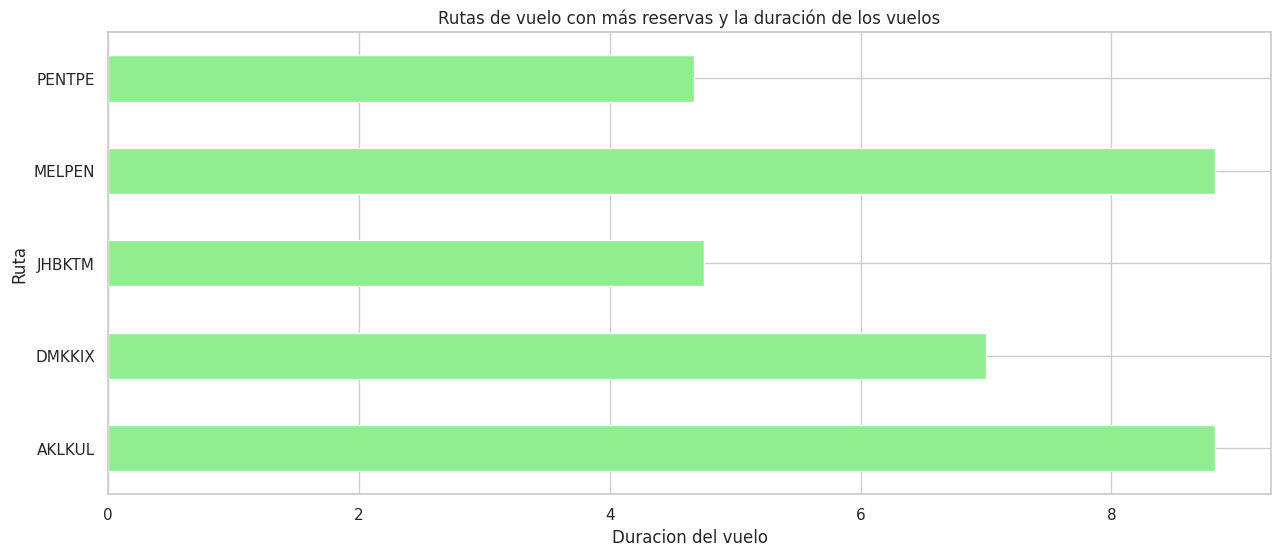

In [ ]:
d = customer_airways_data[customer_airways_data['booking_complete'] == 1]
d = d.loc[(d['route'] == 'AKLKUL') | (d['route'] == 'PENTPE') | (d['route'] == 'DMKKIX') | (d['route'] == 'JHBKTM') | (d['route'] == 'MELPEN'), :]
d = d.groupby('route')['flight_duration'].mean()
d.plot(kind='barh', figsize=(15,6), color='lightgreen')
plt.title('Rutas de vuelo con más reservas y la duración de los vuelos')
plt.xlabel('Duracion del vuelo')
plt.ylabel('Ruta')
plt.show()


In [ ]:
z = customer_airways_data[customer_airways_data['booking_complete'] == 1]
z = z.groupby('route')['flight_duration'].mean()
z.nlargest(5)

route
CGKJED                   9.50
JEDKNO                   9.50
JEDPEN                   9.50
AKLKUL                   8.83
AORMEL                   8.83
Name: flight_duration, dtype: float64

## word cloud

In [ ]:
import nltk
from nltk.probability import FreqDist
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


quiero analizar los reviews si son sentimientos positivos o negativos a traves de polarity

In [ ]:
def polaridad(text):
    return TextBlob(text).sentiment.polarity
def sentimiento(score):
  if score <= 0:
    return 'Negativo'
  else:
    return 'Positivo'

reviews_limpias['puntaje'] = reviews_limpias['comments'].map(polaridad)
reviews_limpias['sentimiento'] = reviews_limpias['puntaje'].map(sentimiento)
reviews_limpias.head()

,reviews,rates,date,country,verified,comments,flight_day,puntaje,sentimiento
0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,Tue,0.31,Positivo
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,Tue,0.26,Positivo
2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,Mon,0.25,Positivo
3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,Sat,-0.05,Negativo
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,Thu,-0.14,Negativo


In [ ]:
sentiment_counts = reviews_limpias['sentimiento'].value_counts()
print(sentiment_counts)

sentimiento
Positivo    2421
Negativo     962
Name: count, dtype: int64


In [ ]:
reviews = ' '.join(str(word) for word in reviews_limpias['comments'])
token_reviews = word_tokenize(reviews)

In [ ]:
distribucion_de_frecuencia = FreqDist(token_reviews)
distribucion_de_frecuencia

FreqDist({'flight': 7160, 'ba': 4586, 'seat': 4178, 'service': 2732, 'time': 2242, 'food': 2236, 'london': 2117, 'crew': 2070, 'british': 1998, 'airway': 1990, ...})

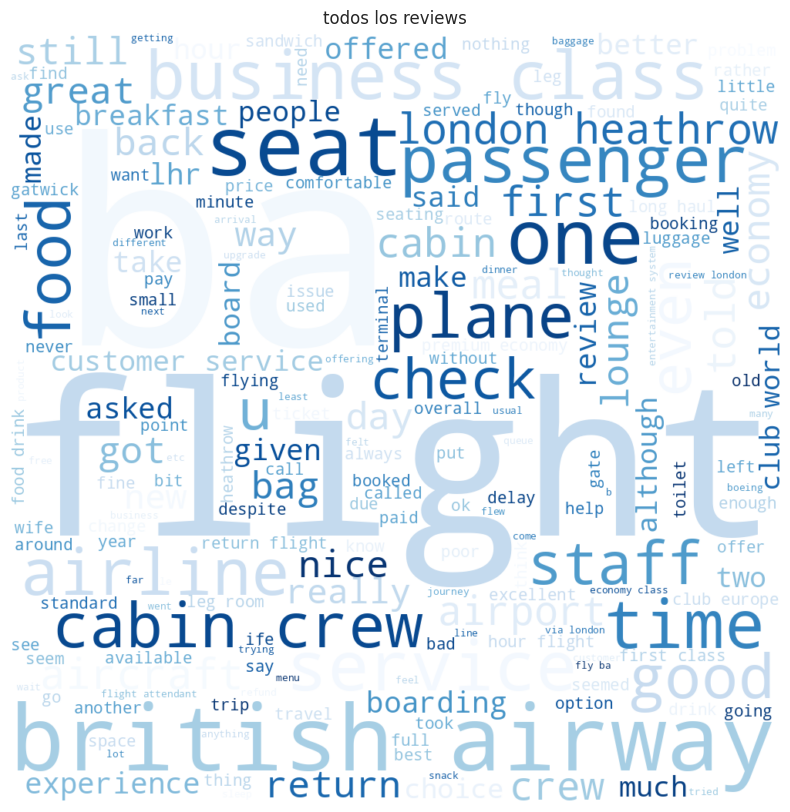

In [ ]:
all_text = ' '.join(word for word in reviews_limpias["comments"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("todos los reviews")
plt.margins(x=0, y=0)
plt.show()

Hay demasiadas palabras que no dicen nada, como flight, ba, london, los agrego a stopwords

In [ ]:
stopwords = stopwords.words('english')
stopwords.extend(["ba", "flight", "even","see","found","enough","two","one","british", "airway", "airline", "plane", "told", "also", "passenger","london", "heathrow", "aircraft", "could", "even", "would", "u"])

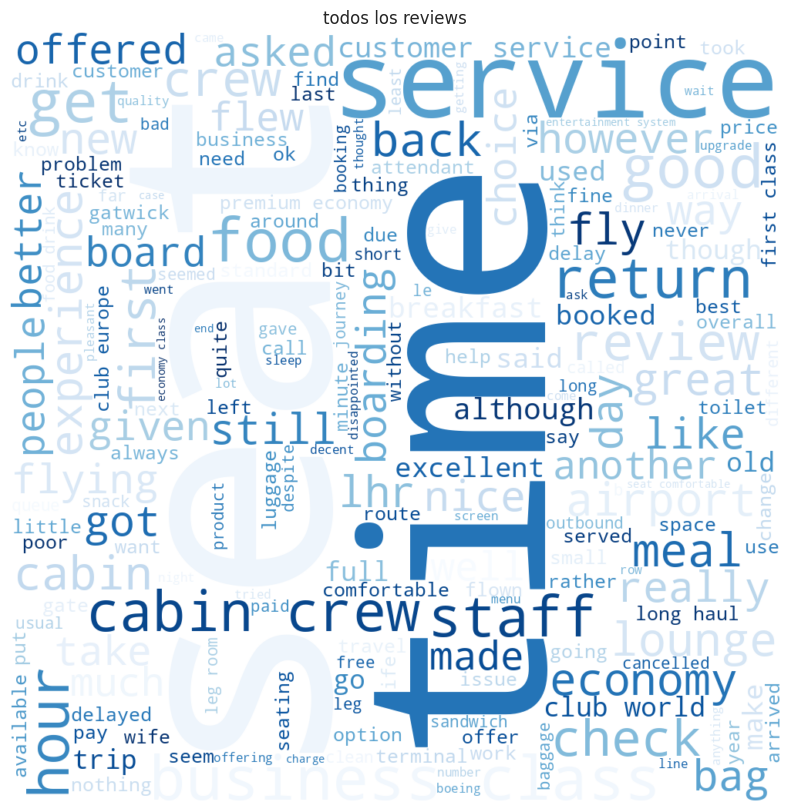

In [ ]:
all_text = ' '.join(word for word in reviews_limpias["comments"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white', stopwords=stopwords).generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("todos los reviews")
plt.margins(x=0, y=0)
plt.show()

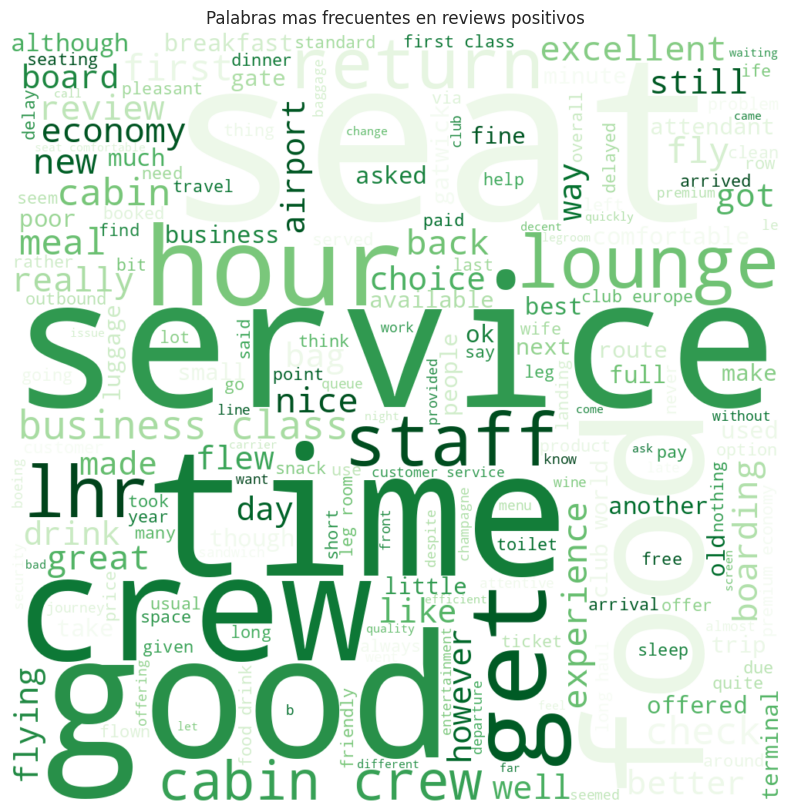

In [ ]:
pos_text = ' '.join(word for word in reviews_limpias[(reviews_limpias['sentimiento'] == 'Positivo') & (reviews_limpias['rates'] >= 5)]["comments"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white', stopwords=stopwords).generate(pos_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras mas frecuentes en reviews positivos")
plt.margins(x=0, y=0)
plt.show()

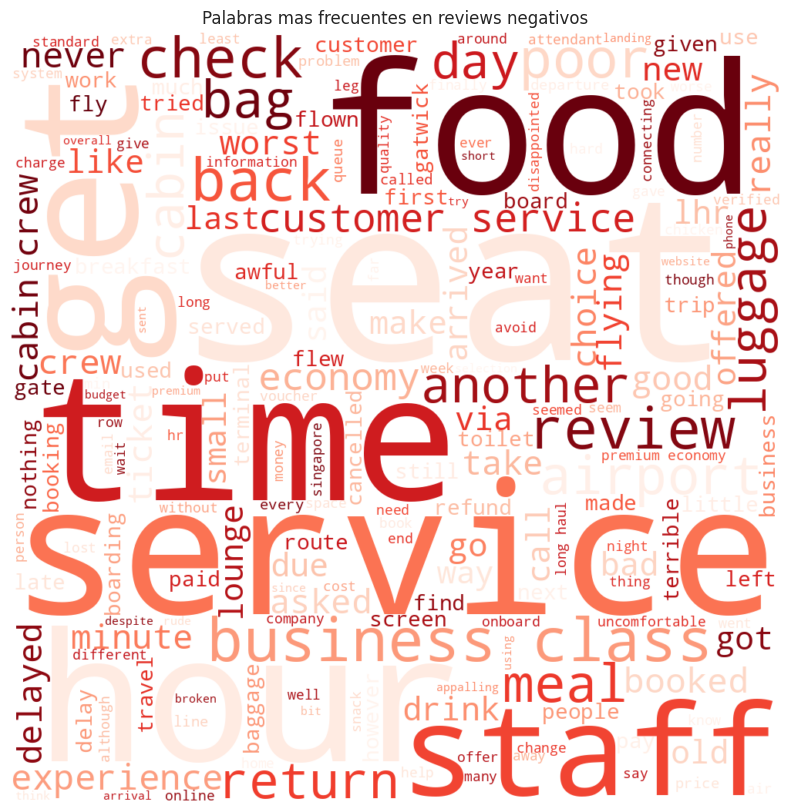

In [ ]:
neg_text = ' '.join(word for word in reviews_limpias[(reviews_limpias['sentimiento']=='Negativo') & (reviews_limpias['rates'] < 5)]["comments"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white', stopwords=stopwords).generate(neg_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras mas frecuentes en reviews negativos")
plt.margins(x=0, y=0)
plt.show()